# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

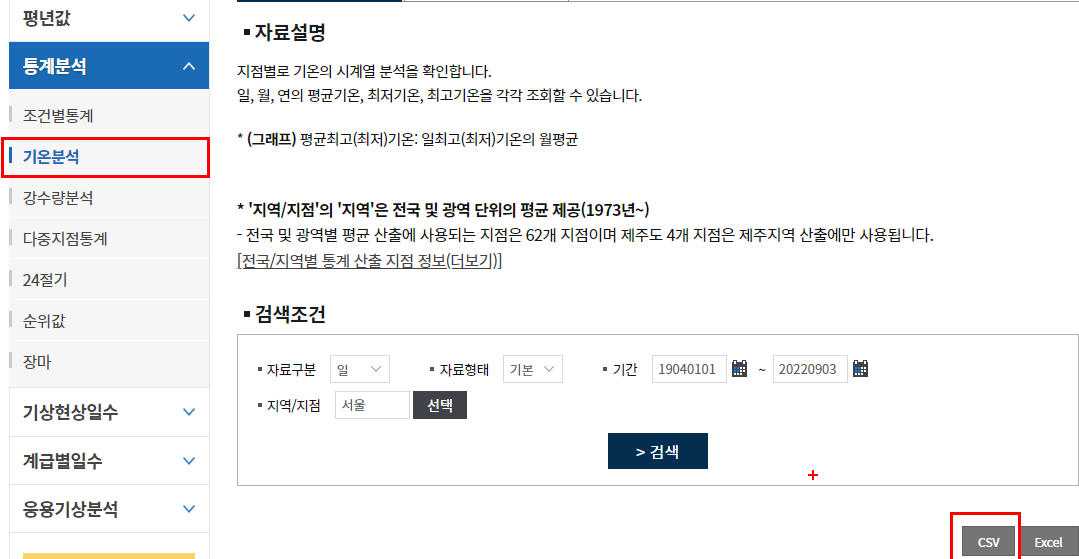

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 9.6 MB/s eta 0:00:00
     -------------------------------------- 959.8/959.8 kB 8.7 MB/s eta 0:00:00
     ------------------------------------- 162.0/162.0 kB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [75]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/utf_ta_20220920102851.csv')
df.head(10)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
5,1907-10-06,108,13.0,11.2,21.3
6,1907-10-07,108,11.3,6.3,16.1
7,1907-10-08,108,8.9,3.9,14.9
8,1907-10-09,108,11.6,3.8,21.1
9,1907-10-10,108,14.2,6.4,24.1


인코딩 에러시
1. 엑셀에서 csv utf8로 저장
2. 메모장에서 모든파일 + utf 8 로 저장해서 사용
3. df = pd.read_csv('./data/utf_ta_20220920102851.csv' encoding='utf-8') 도 가능
3. 위 데이터는 6행까지는 불필요한 데이터. 난 삭제후 사용 아니면 
df = pd.read_csv('./data/utf_ta_20220920102851.csv' header(6)) 와 같이 사용

## 데이터 살펴보기

In [76]:
df.count()

날짜         41562
지점         41562
평균기온(℃)    40806
최저기온(℃)    40803
최고기온(℃)    40803
dtype: int64

In [77]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [78]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [79]:
df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [17]:
df[df['평균기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


1950~1953은 전쟁으로 관측불가

In [80]:
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [ ]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음



In [ ]:
# 2017년에도 결측치 있네...


### 결측치 데이터 처리


In [81]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
# 실제 최고기운을 알기 위해서 결측치를 -999로 해서 다 내림



In [82]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [83]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df[df['날짜'].str.contains('1950')]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15433,1950-01-01,108,2.8,0.7,4.5
15434,1950-01-02,108,-0.1,-3.8,2.4
15435,1950-01-03,108,-4.6,-7.3,-0.7
15436,1950-01-04,108,-7.7,-11.2,-4.2
15437,1950-01-05,108,-7.0,-11.6,-3.1
...,...,...,...,...,...
15727,1950-10-27,108,0.0,999.0,-999.0
15728,1950-10-28,108,0.0,999.0,-999.0
15729,1950-10-29,108,0.0,999.0,-999.0
15730,1950-10-30,108,0.0,999.0,-999.0


## 컬럼명 바꾸기

In [84]:
df.rename(columns = {'평균기온(℃)':'평균기온','최저기온(℃)':'최저기온','최고기온(℃)':'최고기온'  }, inplace=True)

In [85]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 서울에서 가장 더웠던 날은?

In [86]:
#최고 더운 날은?
df.sort_values(by=['최고기온'],ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [101]:
df.iloc[40051,[0,4]]

날짜      2018-08-01
최고기온          39.6
Name: 40051, dtype: object

In [91]:
df.loc[40051,['날짜','최고기온']]

날짜      2018-08-01
최고기온          39.6
Name: 40051, dtype: object

In [34]:
df.loc[40051,'날짜']

'2018-08-01'

In [36]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
df_date = df.loc[40051,"날짜"]
df_deg = df.loc[40051,'최고기온']

print("서울에서 가장 더웠던 날은? {0} : {1}".format(df_date,df_deg),"도")

서울에서 가장 더웠던 날은? 2018-08-01 : 39.6 도


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [42]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/utf_ta_20220920102851.csv')

# 결측치 처리
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(999)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(-999)
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)

#데이터 전처리(컬렴명 수정)
df.rename(columns = {'평균기온(℃)':'평균기온',
                     '최저기온(℃)':'최저기온',
                     '최고기온(℃)':'최고기온'}, inplace=True)


In [43]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 내 생일 데이터만 추출

In [46]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출 (09-07)
birth_df = df[df['날짜'].str.contains('-09-07')]




In [47]:
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온
342,1908-09-07,108,21.1,17.9,28.0
707,1909-09-07,108,21.8,16.4,28.8
1072,1910-09-07,108,19.7,14.2,25.6
1437,1911-09-07,108,23.4,19.0,28.7
1803,1912-09-07,108,20.9,17.4,26.7


## 필요한 컬럼만 추출

In [50]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜',"평균기온"]]
birth_df


,날짜,평균기온
342,1908-09-07,21.1
707,1909-09-07,21.8
1072,1910-09-07,19.7
1437,1911-09-07,23.4
1803,1912-09-07,20.9
...,...,...
40088,2018-09-07,22.0
40453,2019-09-07,25.7
40819,2020-09-07,19.2
41184,2021-09-07,19.6


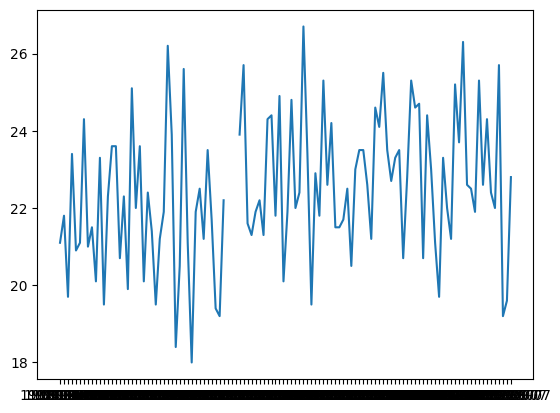

In [58]:
# 내 생일 데이터 그래프 그리기

plt.plot(birth_df['날짜'],birth_df['평균기온'])



## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [55]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/utf_ta_20220920102851.csv')

#데이터 전처리(컬렴명 수정)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

In [59]:
# 결측 데이터 삭제
df.dropna(axis=0)
# axis=1 은 열 제거

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41557,2022-09-15,108,25.2,22.0,28.3
41558,2022-09-16,108,25.7,23.4,29.9
41559,2022-09-17,108,25.6,23.3,29.4
41560,2022-09-18,108,27.1,23.0,32.5


## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [70]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
birth_df = df[df['날짜'].str.contains('-09-07')]
birth_df = birth_df[birth_df['날짜']>'1979-09-07']
birth_df


,날짜,지점,평균기온,최저기온,최고기온
26209,1980-09-07,108,21.7,18.5,27.0
26574,1981-09-07,108,22.5,16.9,28.0
26939,1982-09-07,108,20.5,15.2,25.9
27304,1983-09-07,108,23.0,20.0,26.9
27670,1984-09-07,108,23.5,19.6,28.7
28035,1985-09-07,108,23.5,19.6,28.5
28400,1986-09-07,108,22.6,19.0,27.0
28765,1987-09-07,108,21.2,18.4,24.8
29131,1988-09-07,108,24.6,19.1,30.8
29496,1989-09-07,108,24.1,19.2,29.5


In [71]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜',"평균기온"]]

Text(0, 1, 'average temperature (℃)')

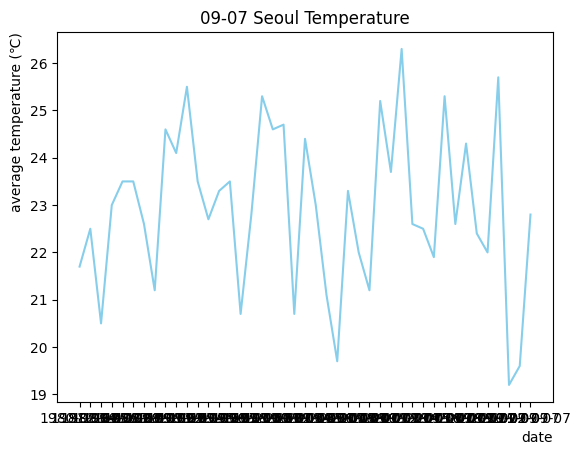

In [106]:
# 내 생일 데이터 그래프 그리기
from turtle import color


plt.plot(birth_df['날짜'],birth_df['평균기온'], color= 'skyblue')
plt.title('09-07 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')


## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [107]:
# 날짜 컬럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41562 non-null  object 
 1   지점      41562 non-null  int64  
 2   평균기온    41562 non-null  float64
 3   최저기온    41562 non-null  float64
 4   최고기온    41562 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


### object -> datetime64[ns] 형변환

In [111]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41562 non-null  datetime64[ns]
 1   지점      41562 non-null  int64         
 2   평균기온    41562 non-null  float64       
 3   최저기온    41562 non-null  float64       
 4   최고기온    41562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [112]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [118]:
df['날짜'].dt.year
# month, day 바꾸면 다 가능

0        10
1        10
2        10
3        10
4        10
         ..
41557     9
41558     9
41559     9
41560     9
41561     9
Name: 날짜, Length: 41562, dtype: int64

In [119]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [123]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


### 내 생일이면서 1980년 이후의 데이터만 추출

In [152]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/utf_ta_20220920102851.csv')

# 결측치 처리
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(999)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(-999)
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)

#데이터 전처리(컬렴명 수정)
df.rename(columns = {'평균기온(℃)':'평균기온',
                     '최저기온(℃)':'최저기온',
                     '최고기온(℃)':'최고기온'}, inplace=True)

In [ ]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
birth_df = df[df['날짜'].str.contains('-09-07')]
birth_df = birth_df[birth_df['날짜']>'1979-09-07']
birth_df

In [159]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜','평균기온']]
birth_df['날짜'] = birth_df['날짜'].astype('datetime64')
# X축에 날짜가 나오도록해서 다시 출력
birth_df['날짜'] = birth_df['날짜'].dt.year


C:\Users\USER\AppData\Local\Temp\ipykernel_1816\4227387974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_df['날짜'] = birth_df['날짜'].astype('datetime64')
C:\Users\USER\AppData\Local\Temp\ipykernel_1816\4227387974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_df['날짜'] = birth_df['날짜'].dt.year


## 그래프 그리기

Text(0, 1, 'average temperature (℃)')

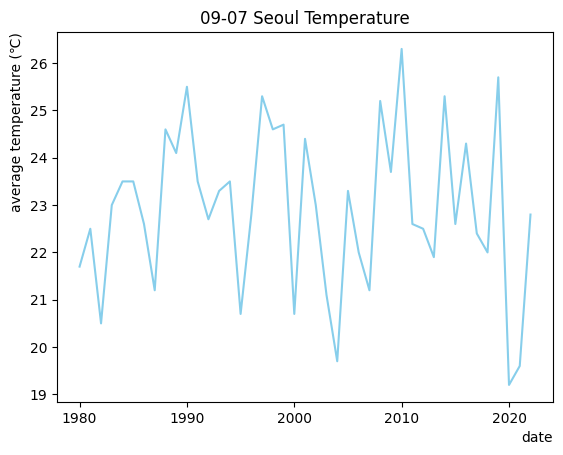

In [163]:

plt.plot(birth_df['날짜'],birth_df['평균기온'], color= 'skyblue')
plt.title('09-07 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

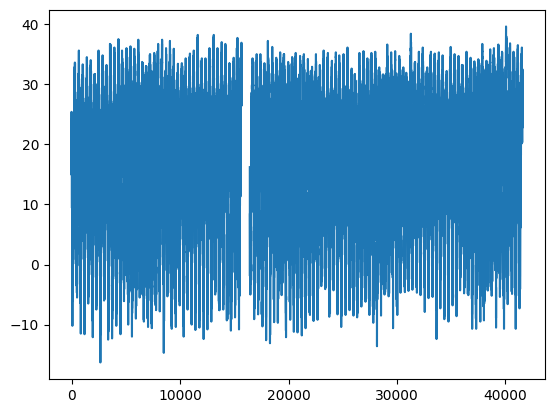

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/utf_ta_20220920102851.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

In [2]:
plt.plot(df['최고기온'])
plt.show()
plt.plot(df['최저기온'])
plt.show()

NameError: name 'plt' is not defined

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/utf_ta_20220920102851.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



(array([  35.,  596., 2812., 5465., 5275., 4915., 6248., 9004., 5915.,
         538.]),
 array([-16.3 , -10.71,  -5.12,   0.47,   6.06,  11.65,  17.24,  22.83,
         28.42,  34.01,  39.6 ]),
 <BarContainer object of 10 artists>)

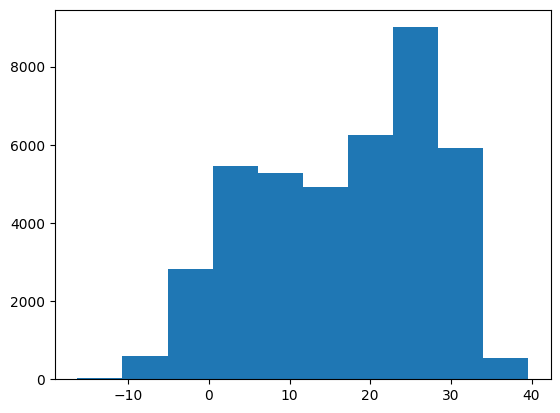

In [183]:
plt.hist(df['최고기온'])

<AxesSubplot: >

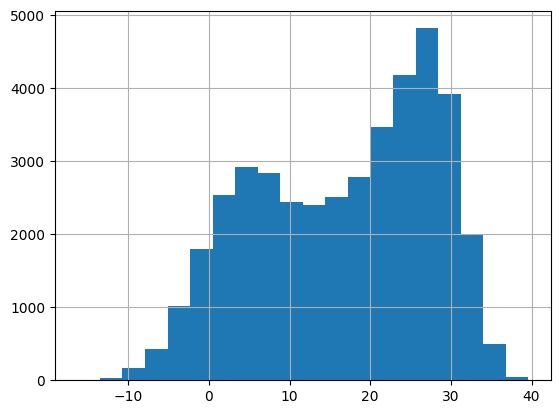

In [184]:
df['최고기온'].hist(bins=20) # 20구간으로 나눠서 시각화

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [192]:
# 결측치 삭제
df.dropna(inplace=True)
# 날짜 타입으로 반환
df['날짜'] = df['날짜'].astype('datetime64')



In [ ]:
df.info()

In [195]:
# 8월만으로 변환
aug_df = df[df['날짜'].dt.month == 8]
aug_df

,날짜,지점,평균기온,최저기온,최고기온
305,1908-08-01,108,26.2,24.4,29.6
306,1908-08-02,108,26.4,23.3,30.7
307,1908-08-03,108,26.9,24.2,32.0
308,1908-08-04,108,26.3,22.6,31.5
309,1908-08-05,108,27.3,23.6,32.4
...,...,...,...,...,...
41538,2022-08-27,108,21.5,17.6,25.5
41539,2022-08-28,108,22.6,16.1,28.4
41540,2022-08-29,108,21.0,19.5,22.5
41541,2022-08-30,108,19.1,17.9,20.3


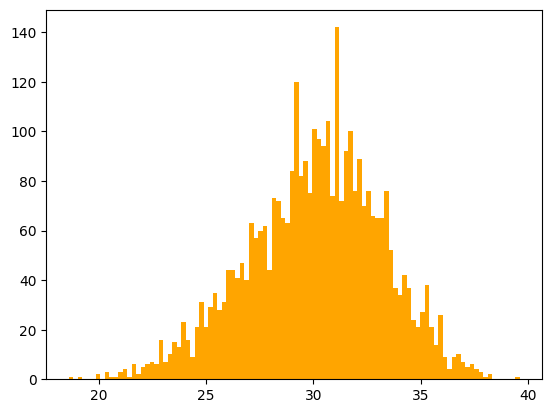

In [198]:
# hist(데이터,몇개구간,색깔)
plt.hist(aug_df['최고기온'],bins=100, color='orange')
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [201]:

# 8월 데이터만 추출
aug_df = df[df['날짜'].dt.month == 8]

# 1월 데이터만 추출
jan_df = df[df['날짜'].dt.month == 1]

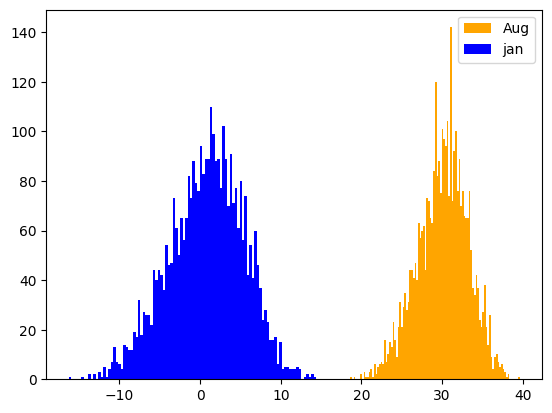

In [210]:
plt.hist(aug_df['최고기온'],bins=100, color='orange', label='Aug')
plt.hist(jan_df['최고기온'],bins=100,color='blue', label='jan')
plt.legend()
plt.show()

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/utf_ta_20220920102851.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


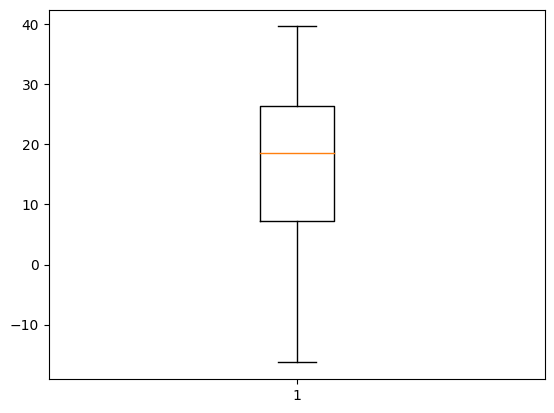

In [215]:
plt.boxplot(df['최고기온'])
plt.show()

In [216]:
df['최고기온'].describe()

count    40802.000000
mean        16.784462
std         10.980112
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/utf_ta_20220920102851.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [217]:
# 내 생일 데이터 그래프 그리기
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
#plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지